<IPython.core.display.Javascript object>


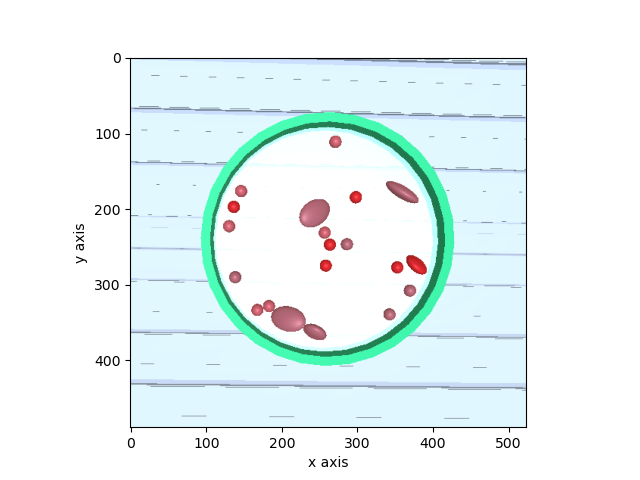

In [105]:
import matplotlib.pyplot as plt
%matplotlib notebook
import detObjFunc as RV
orImage=RV.loadImage("petriDish_test_5.png")
RV.showImage(orImage,"original image")

In [106]:
def findBacteria(iImage):
    draw=0
    minR=50
    maxR=300
    dishThickness=10
    import detObjFunc as RV
    import cv2
    import matplotlib.pyplot as plt
    import detObjFunc as RV
    from PIL import Image
    import numpy as np
    #grImage=cv2.cvtColor(iImage,cv2.COLOR_RGB2GRAY)
    drImage=iImage
    #get circle of petri dish
    grImage=cv2.GaussianBlur(cv2.cvtColor(iImage,cv2.COLOR_RGB2GRAY), (19,19),0 );
    #drImage=cv2.cvtColor(iImage,cv2.COLOR_RGB2RGB)
    foundVar=cv2.HoughCircles(grImage,cv2.HOUGH_GRADIENT,1,50,param1=100,param2=50,minRadius=minR,maxRadius=maxR)
    if foundVar is not None:
        foundVar=np.round(foundVar[0,:]).astype("int")
    if draw:
        print(foundVar)
        for (x,y,r) in foundVar:
            drImage=cv2.circle(drImage,(x,y),r,(0,0,255),round(dishThickness*1.75))
        RV.showImage(drImage,"found petri dish")
    #remove everything outside the circle on the red channel
    tImage=cv2.GaussianBlur(iImage[:,:,0], (15,15),0 );
    for x in range(tImage.shape[1]):
        for y in range(tImage.shape[0]):
            if (((x-foundVar[0,0])**2)+((y-foundVar[0,1])**2)>((foundVar[0,2]-dishThickness)**2)):
                tImage[y,x]=0
    RV.showImage(tImage,"removed background and thresholded")
    #threshold and mask
    (t1,tmp1)=cv2.threshold(tImage,140,1,cv2.THRESH_BINARY)
    (t2,tmp2)=cv2.threshold(tImage,230,1,cv2.THRESH_BINARY)
    mask=255*np.multiply(tmp1,(np.ones_like(tmp2)-tmp2))
    if draw:
        RV.showImage(255*tmp1,"thr1")
        RV.showImage(255*(1-tmp2),"thr2")
    RV.showImage(mask,"mask")
    #erode and dilate
    kernel = np.ones((3,3),np.uint8)
    mask = cv2.erode(mask,kernel,iterations = 5)
    RV.showImage(mask,"eroded")
    mask = cv2.dilate(mask,kernel,iterations = 3)
    RV.showImage(mask,"dilated")

<IPython.core.display.Javascript object>


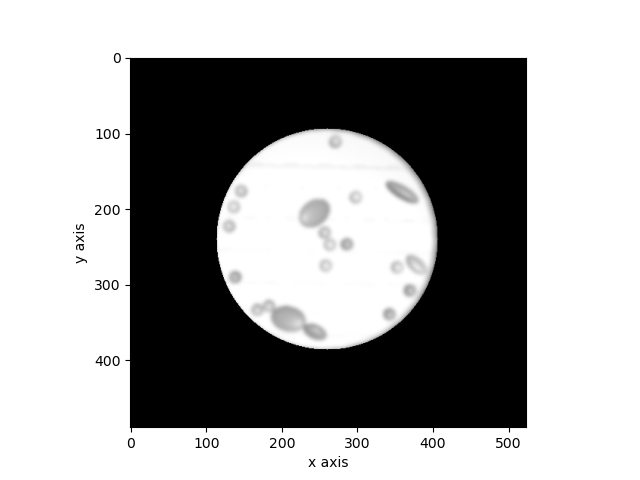

<IPython.core.display.Javascript object>


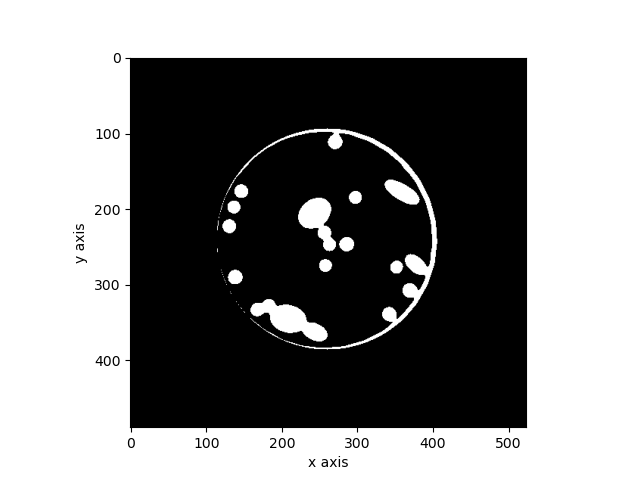

<IPython.core.display.Javascript object>


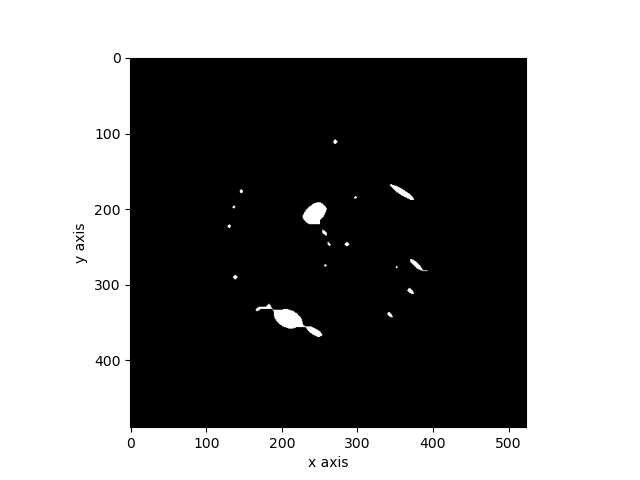

<IPython.core.display.Javascript object>


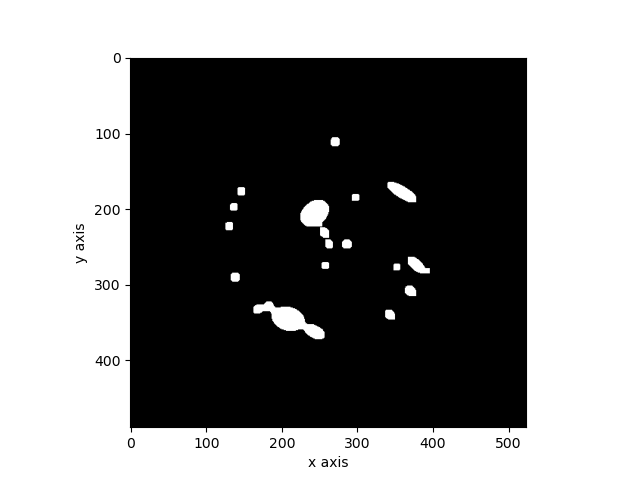

In [107]:
findBacteria(orImage)